In [2]:
import os
import rasterio
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
def stretch_8bit(band, lower_percent=5, higher_percent=95):
    a = 0
    b = 255
    real_values = band.flatten()
    real_values = real_values[real_values > 0]
    c = np.percentile(real_values, lower_percent)
    d = np.percentile(real_values, higher_percent)
    t = a + (band - c) * (b - a) / (d - c)
    t[t<a] = a
    t[t>b] = b
    return t.astype(np.uint8)

In [74]:
r06 = rasterio.open('../../datasets/buildings_change/Images/ortho_2006.tif')
r07 = rasterio.open('../../datasets/buildings_change/Images/ortho_2007.tif')
r09 = rasterio.open('../../datasets/buildings_change/Images/ortho_2009.tif')
r10 = rasterio.open('../../datasets/buildings_change/Images/ortho_2010.tif')
r11 = rasterio.open('../../datasets/buildings_change/Images/ortho_2011.tif')

print (r06.shape, r07.shape, r09.shape, r10.shape, r11.shape)

(5662, 6570) (5662, 6570) (5662, 6570) (6794, 7884) (6794, 7884)


In [75]:
d06 = r06.read()
d07 = r07.read()
d09 = r09.read()
d11 = r11.read()

In [71]:
sd06 = []
for b in d06:
    sd06.append(stretch_8bit(b,0.01,99))
rgb06 = cv2.merge([sd06[0], sd06[1], sd06[2]])
cv2.imwrite('06.png', rgb06)

True

In [79]:
sd11 = []
for b in d11:
    sd11.append(stretch_8bit(b,0.01,99))
rgb11 = cv2.merge([sd11[0], sd11[1], sd11[2]])
cv2.imwrite('11.png', rgb11)

True

In [36]:
sd07 = []
for b in d07:
    sd07.append(stretch_8bit(b,2,98))

In [42]:
lr06 = rasterio.open('../../datasets/CHANGE_DETECTION_DATASET/Ground_truth/Changes/Changes_06_07.tif')

In [43]:
ld06 = lr06.read()[0]

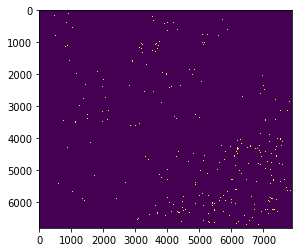

In [34]:
plt.imshow(ld06)

In [33]:
d06.shape, d07.shape

((4, 5662, 6570), (4, 5662, 6570))

In [35]:
ld06.shape

(6794, 7884)

In [63]:
rgb06 = cv2.merge([sd06[0], sd06[1], sd06[2]])
rgb07 = cv2.merge([sd07[0], sd07[1], sd07[2]])

In [44]:
ld06 = cv2.resize(ld06, (rgb06.shape[1], rgb06.shape[0]))

In [47]:
ld06.shape, rgb06.shape

((5662, 6570), (5662, 6570, 3))

In [51]:
rgb06[ld06 == 0] = [0,0,0]
rgb07[ld06 == 0] = [0,0,0]

In [64]:
cv2.imwrite('06.png', rgb06)

True